In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("/kaggle/input/practice/train_set.csv")
df_val = pd.read_csv("/kaggle/input/practice/val_set.csv")
df_test = pd.read_csv("/kaggle/input/practice/test_set.csv")

In [3]:
df_train.index = pd.to_datetime(df_train['date_time_IST'],format = '%d-%m-%Y %H:%M')
df_test.index = pd.to_datetime(df_test['date_time_IST'],format = '%d-%m-%Y %H:%M')
df_val.index = pd.to_datetime(df_val['date_time_IST'],format = '%d-%m-%Y %H:%M')

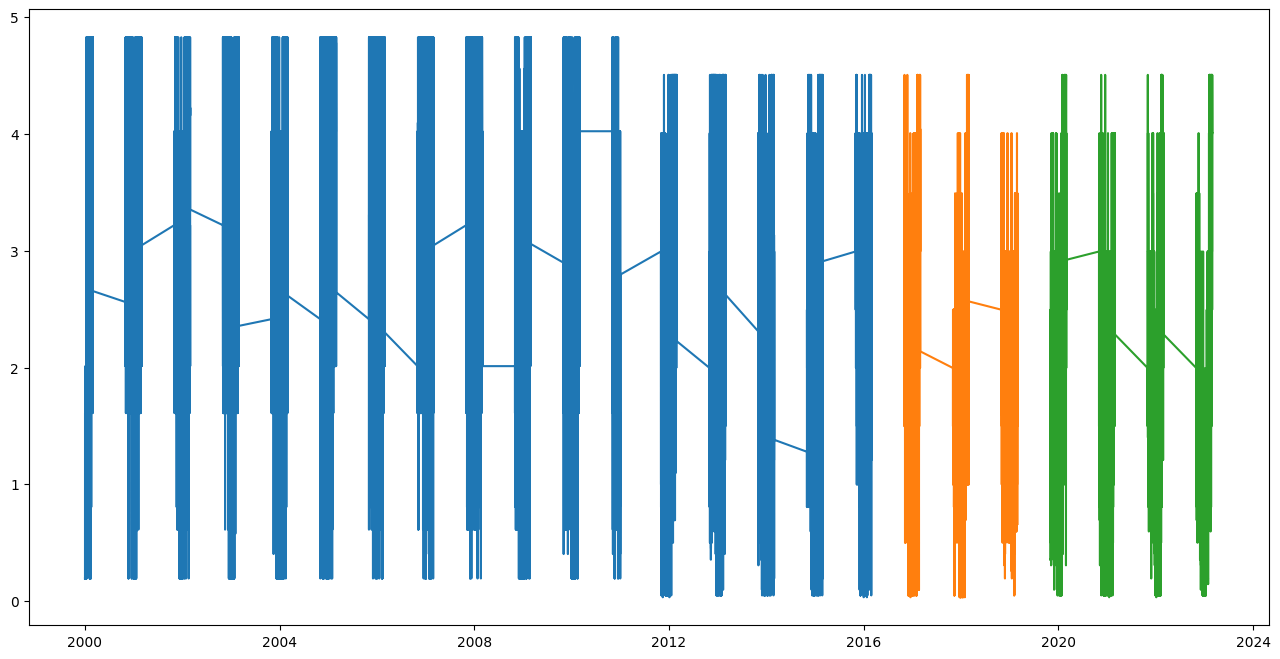

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df_train['3hr_vsby_km'])
plt.plot(df_val['3hr_vsby_km'])
plt.plot(df_test['3hr_vsby_km'])


In [5]:
'''removing only the date_time_IST column and keeping everything else'''
df_train = df_train.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
df_test = df_test.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
df_val = df_val.drop(columns=['30min_fog', '1hr_fog', '1.5hr_fog', '2hr_fog',
       '2.5hr_fog', '3hr_fog', '6hr_fog', '30min_fog_type', '1hr_fog_type',
       '1.5hr_fog_type', '2hr_fog_type', '2.5hr_fog_type', '3hr_fog_type',
       '6hr_fog_type', '3hr_onset_cond','date_time_IST','30min_vsby_km', '1hr_vsby_km', '1.5hr_vsby_km',
       '2hr_vsby_km', '2.5hr_vsby_km', '6hr_vsby_km'])
# df_train = df_train.drop(columns=['date_time_IST'])
# df_test = df_test.drop(columns=['date_time_IST'])
# df_val = df_val.drop(columns=['date_time_IST'])

In [6]:
print(df_train.columns)
print(len(df_train.columns))

Index(['tmpc', 'dwpc', 'relh', 'drct', 'wspeedkm', 'pressure', 'vsbykm',
       'feelc', 'cos_min_time', 'sin_min_time', 'fog_time', 'fog_month',
       'diff_tempc_dwpc', '3hr_vsby_km'],
      dtype='object')
14


In [7]:
df_train.head()


,tmpc,dwpc,relh,drct,wspeedkm,pressure,vsbykm,feelc,cos_min_time,sin_min_time,fog_time,fog_month,diff_tempc_dwpc,3hr_vsby_km
date_time_IST,,,,,,,,,,,,,,
2000-01-01 00:00:00,10.0,10.0,100.0,0.0,0.0,101693.2917,0.193121,10.0,1.000000,0.000000,1,1,0.0,0.193121
2000-01-01 00:30:00,10.0,10.0,100.0,0.0,0.0,101693.2917,0.193121,10.0,0.991077,0.133287,1,1,0.0,0.193121
2000-01-01 01:00:00,10.0,10.0,100.0,0.0,0.0,101693.2917,0.193121,10.0,0.964469,0.264195,1,1,0.0,0.193121
2000-01-01 01:30:00,10.0,10.0,100.0,0.0,0.0,101667.8938,0.193121,10.0,0.920650,0.390389,1,1,0.0,0.193121
2000-01-01 02:30:00,10.0,10.0,100.0,0.0,0.0,101617.0979,0.193121,10.0,0.784799,0.619750,1,1,0.0,0.193121


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train)
train_data_scaled = scaler.transform(df_train)
val_data_scaled = scaler.transform(df_val)
test_data_scaled = scaler.transform(df_test)

In [9]:
def df_to_X_y(df,window_size=48):
    df_as_np = df
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = df_as_np[i:i + window_size, :13]
        X.append(row)
        label = df_as_np[i+window_size][13]
        y.append(label)

    return np.array(X),np.array(y)
X_train,y_train = df_to_X_y(train_data_scaled)
X_val,y_val = df_to_X_y(val_data_scaled)
X_test,y_test=df_to_X_y(test_data_scaled)
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape


((78843, 48, 13),
 (78843,),
 (16340, 48, 13),
 (16340,),
 (22014, 48, 13),
 (22014,))

In [10]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((78843, 48, 13),
 (78843,),
 (16340, 48, 13),
 (16340,),
 (22014, 48, 13),
 (22014,))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

modelv = Sequential()
modelv.add(InputLayer((48, 13)))
modelv.add(LSTM(128))
modelv.add(Dense(1,activation = 'relu'))
modelv.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanSquaredError()]
)

checkpoint_callback = ModelCheckpoint('best_modelv.keras',save_best_only = True,monitor = 'val_loss',mode = 'min')

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10, 
    restore_best_weights=True
)
history = modelv.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1998 - mean_absolute_error: 0.2838 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4070 - val_loss: 0.0105 - val_mean_absolute_error: 0.0783 - val_mean_squared_error: 0.0105 - val_root_mean_squared_error: 0.1025
Epoch 2/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.1023 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0120 - val_mean_absolute_error: 0.0830 - val_mean_squared_error: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 3/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0993 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1298 - val_loss: 0.0108 - val_mean_absolute_error: 0.0787 - val_mean_squared_error: 0.0109 - val_root_mean_squared_error: 0.1040
Epoch 4/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0970 - mean_squared_error: 0.0162 - root_mean_s

688/688 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


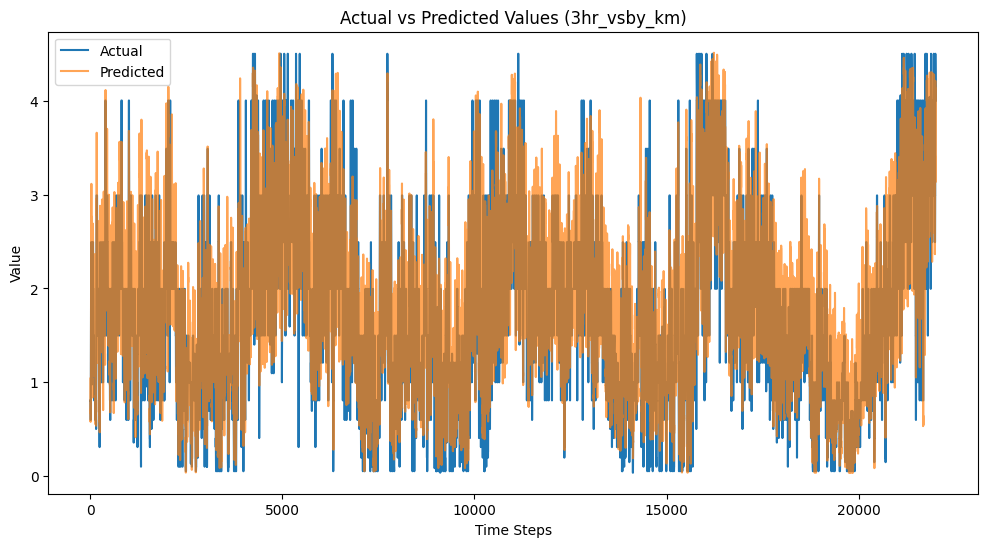

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scalervsby = MinMaxScaler()
scalervsby.fit(df_train.iloc[:, 13].values.reshape(-1, 1))

# Perform predictions and inverse transformations
predictions = modelv.predict(X_test)
predictions_inverse = scalervsby.inverse_transform(predictions)

y_test_6th_column = y_test.reshape(-1, 1)  # Reshape to (n_samples, 1)
y_test_inverse = scalervsby.inverse_transform(y_test_6th_column)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual',)
plt.plot(predictions_inverse, label='Predicted',alpha = 0.7)
plt.title('Actual vs Predicted Values (3hr_vsby_km)')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test_inverse,predictions_inverse))
mae = mean_absolute_error(y_test_inverse,predictions_inverse)
r2 = r2_score(y_test_inverse,predictions_inverse)
print("test-rmse: ",rmse)
print('test-mae:',mae)
print('test-r2_score: ',r2)

test-rmse:  0.46597543402935565
test-mae: 0.3649851708819568
test-r2_score:  0.7747828878328692


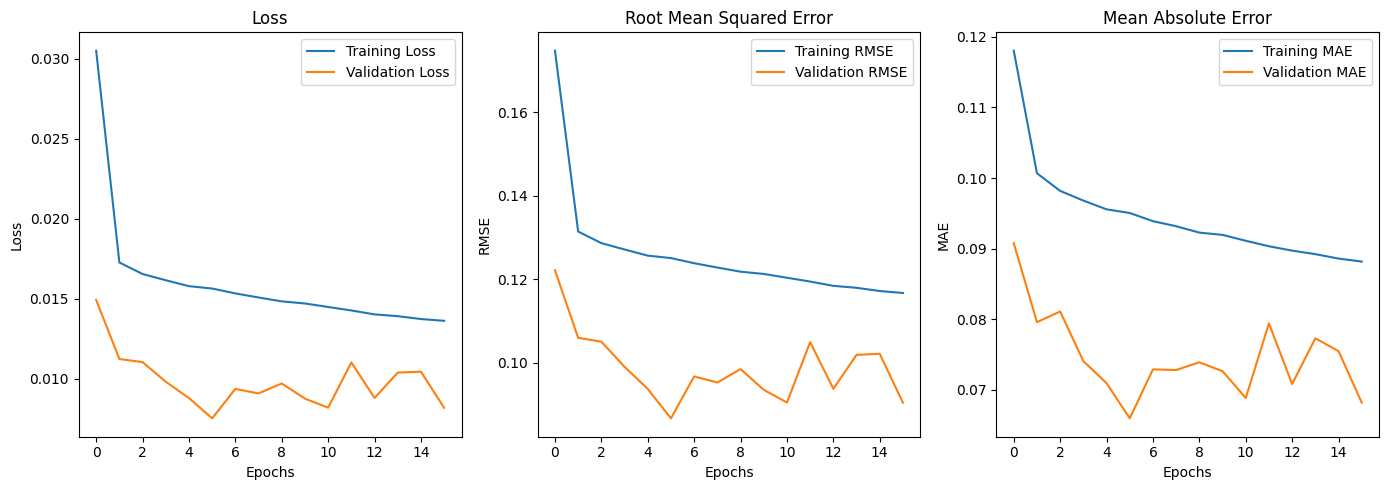

In [83]:
import matplotlib.pyplot as plt

# Extract metrics from history
loss = history.history['loss']
val_loss = history.history['val_loss']
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot RMSE
plt.subplot(1, 3, 2)
plt.plot(rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.title('Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 3)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(InputLayer((48, 13)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanSquaredError()]
)


model.summary()
checkpoint_callback = ModelCheckpoint('best_model.keras',save_best_only = True,monitor = 'val_loss',mode = 'min')

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[checkpoint_callback, early_stopping_callback])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 48, 128)        │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 48, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 48, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,561 (525.63 KB)

 Trainable params: 134,561 (525.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - loss: 0.0546 - mean_absolute_error: 0.1572 - mean_squared_error: 0.0546 - root_mean_squared_error: 0.2173 - val_loss: 0.0104 - val_mean_absolute_error: 0.0778 - val_mean_squared_error: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 2/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0186 - mean_absolute_error: 0.1052 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0116 - val_mean_absolute_error: 0.0790 - val_mean_squared_error: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 3/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0173 - mean_absolute_error: 0.1006 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1316 - val_loss: 0.0092 - val_mean_absolute_error: 0.0717 - val_mean_squared_error: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 4/30
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0170 - mean_absolute_error: 0.0996 - mean_squared_error: 0.0170 - root

688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


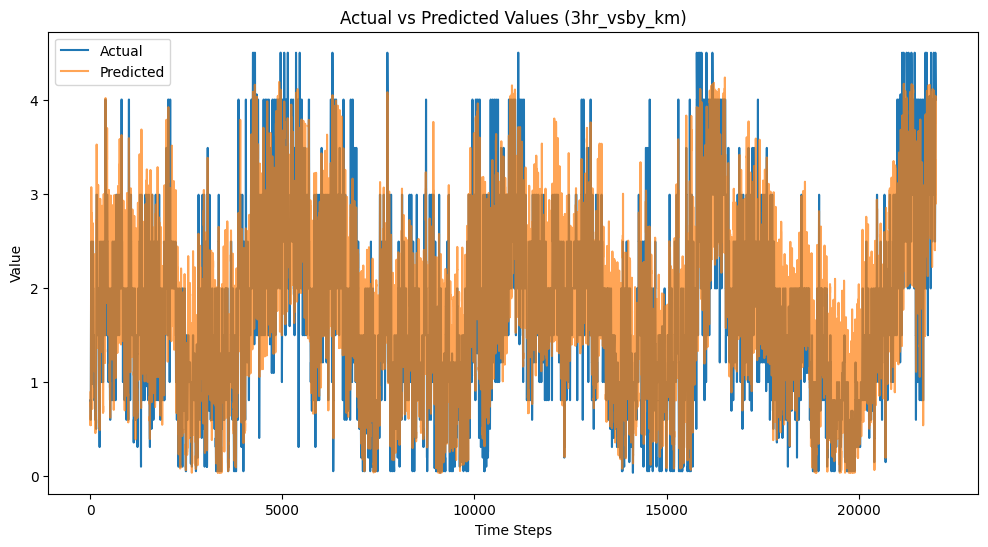

test-rmse:  0.49546150594614
test-mae: 0.39013624322612817
test-r2_score:  0.7453784373734859


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scalervsby = MinMaxScaler()
scalervsby.fit(df_train.iloc[:, 13].values.reshape(-1, 1))

# Perform predictions and inverse transformations
predictions = model.predict(X_test)
predictions_inverse = scalervsby.inverse_transform(predictions)

y_test_6th_column = y_test.reshape(-1, 1)  # Reshape to (n_samples, 1)
y_test_inverse = scalervsby.inverse_transform(y_test_6th_column)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual')
plt.plot(predictions_inverse, label='Predicted',alpha = 0.7)
plt.title('Actual vs Predicted Values (3hr_vsby_km)')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test_inverse,predictions_inverse))
mae = mean_absolute_error(y_test_inverse,predictions_inverse)
r2 = r2_score(y_test_inverse,predictions_inverse)
print("test-rmse: ",rmse)
print('test-mae:',mae)
print('test-r2_score: ',r2)

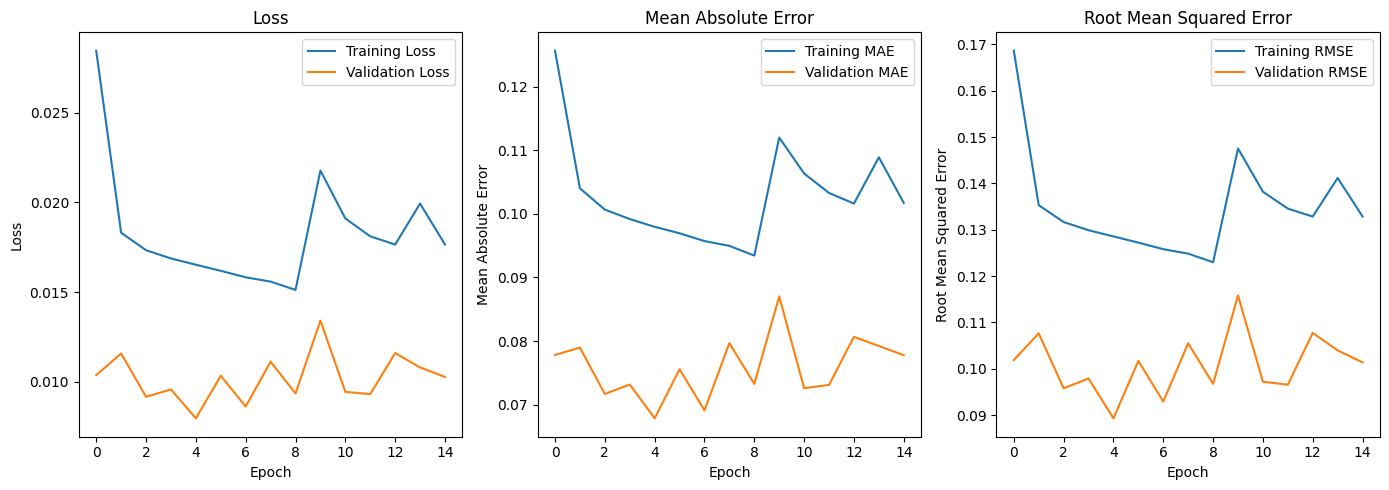

In [29]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable where the training history is stored
history_dict = history.history

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1 ,3, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mean Absolute Error
if 'mean_absolute_error' in history_dict:
    plt.subplot(1, 3, 2)
    plt.plot(history_dict['mean_absolute_error'], label='Training MAE')
    plt.plot(history_dict['val_mean_absolute_error'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()


# Root Mean Squared Error
if 'root_mean_squared_error' in history_dict:
    plt.subplot(1, 3, 3)
    plt.plot(history_dict['root_mean_squared_error'], label='Training RMSE')
    plt.plot(history_dict['val_root_mean_squared_error'], label='Validation RMSE')
    plt.title('Root Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')
    plt.legend()

plt.tight_layout()
plt.show()
